In [60]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [61]:
X=6 * np.random.rand(200,1) - 3
y=0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)   # 2 degree polynomial

# np.random.rand(200,1) → generates 200 rows and 1 column of random numbers between 0 and 1.
# Multiplying by 6 → scales the range to [0, 6).

# Subtracting 3 → shifts the range to [-3, 3).

# So X is 200 random values uniformly distributed between -3 and 3.


''' np.random.randn(200,1) → Gaussian noise (mean 0, variance 1), added so the data isnt perfectly on the curve → makes it more realistic.'''

' np.random.randn(200,1) → Gaussian noise (mean 0, variance 1), added so the data isnt perfectly on the curve → makes it more realistic.'

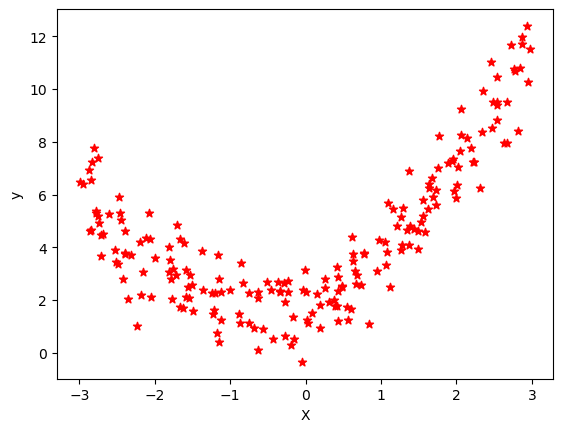

In [62]:
plt.scatter(X,y,color='r',marker='*')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

***first we will apply the simple linear regression not polynomial***

In [63]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


In [65]:
r2_score(y_test,y_pred)

0.41828243365566065

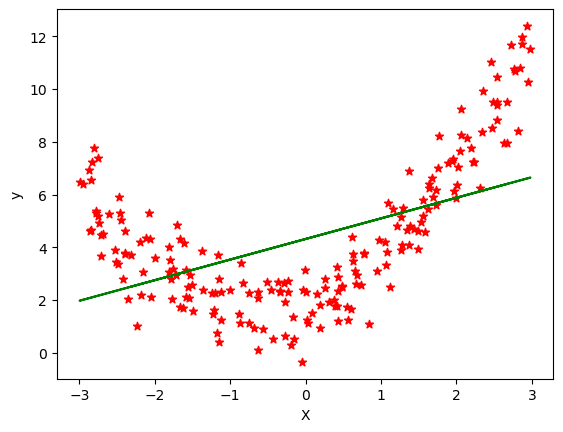

In [66]:
plt.plot(x_train,lr.predict(x_train),color='g')
plt.scatter(X,y,color='r',marker='*')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

***now polynomial regression***

In [67]:
poly=PolynomialFeatures(degree=2,include_bias=True)   # by default the include bias is true which means it will give intercept value also in first col if false then no intecept given
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)

In [68]:
print(x_train[0])
print(x_train_trans[0])

[-2.31417413]
[ 1.         -2.31417413  5.35540191]


In [69]:
lr.fit(x_train_trans,y_train)
y_pred_1=lr.predict(x_test_trans)
r2_score(y_pred_1,y_test)

0.8473953713397067

In [70]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.87177419 0.79783443]]
[1.90152249]


In [71]:
X_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(X_new)
y_new=lr.predict(x_new_poly)

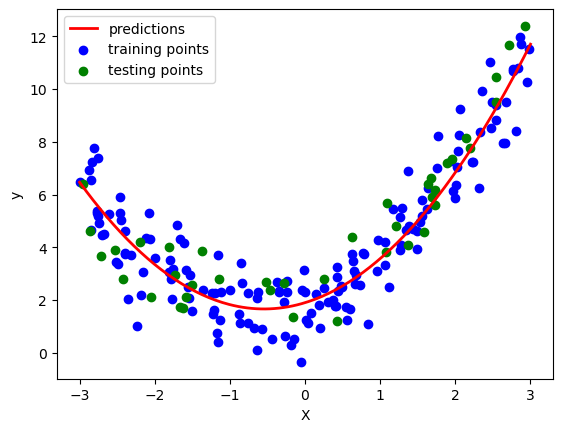

In [72]:
plt.plot(X_new,y_new,color='r',linewidth=2,label='predictions')
plt.scatter(x_train,y_train,color='b',label='training points')
plt.scatter(x_test,y_test,color='g',label='testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [73]:
def predict(degree):
    x_new_1=np.linspace(-3,3,200).reshape(200,1)
    x_new_1_poly=poly.transform(x_new_1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=False)
    Std=StandardScaler()
    lr=LinearRegression()
    pipe=Pipeline([
        ("PolynomialFeatures",poly_features),
        ("standardsclaing",Std),
        ("LinearRegression",lr)
    ])
    pipe.fit(X,y)
    y_new_1=pipe.predict(x_new_1)
    plt.plot(x_new_1,y_new_1,color='r',linewidth=2,label='predictions')
    plt.scatter(x_train,y_train,color='b',marker='.',label='trianing data')
    plt.scatter(x_test,y_test,color='g',marker='.',label='testing data')
    plt.legend(loc='upper left')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis([-3,3,0,10])
    plt.show()

    y_pred_test=pipe.predict(x_test)
    print(r2_score(y_pred_test,y_test))


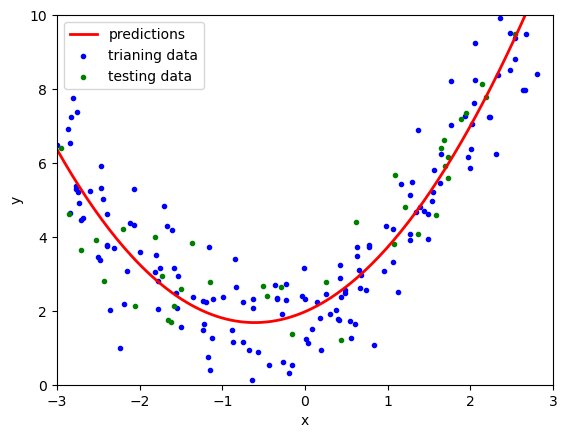

0.8683362531411125


In [74]:
predict(3)  # best degree for this is 2 as we make the equ of 2 degree in starting

*now for 3-d data*

In [75]:
x=7 * np.random.rand(100,1) -2.8
y=7 * np.random.rand(100,1) -2.8
z=x**2 + y**2 + 0.2* x + 0.2* y + 0.1*x*y + 2 + np.random.randn(100,1)

In [76]:
import plotly.express as px
df=px.data.iris()
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()


In [77]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [82]:
lr=LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),y)
x_input=np.linspace(x.min(),x.max(),10)             # array([2. , 2.33, 2.67, 3. , 3.33, 3.67, 4. , 4.33, 4.67, 5. ])
y_input=np.linspace(y.min(),y.max(),10)

x_grid , y_grid =np.meshgrid(x_input,y_input)   

final=np.vstack((x_grid.ravel().reshape(1,100),y_grid.ravel().reshape(1,100))).T

z_final=lr.predict(final).reshape(10,10)
''' 
example if we give x input 1,2,3 and y 10 ,20 ,30
x_grid =
[[1 2 3]
 [1 2 3]
 [1 2 3]]

y_grid =
[[10 10 10]
 [20 20 20]
 [30 30 30]]'''

' \nexample if we give x input 1,2,3 and y 10 ,20 ,30\nx_grid =\n[[1 2 3]\n [1 2 3]\n [1 2 3]]\n\ny_grid =\n[[10 10 10]\n [20 20 20]\n [30 30 30]]'

In [83]:
import plotly.graph_objects as go
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.show()
